 importing the dependencies and libraries


In [4]:
# importing required libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pickle import dump
from pickle import load

Data collection and processing

In [ ]:
# Load dataset
filename = 'indian_liver_dataset.csv'
df1 = read_csv("/content/indian_liver_patient.csv")

dataset = df1
for i in range(50):
    samp = df1.sample(n = 30)
    dataset = dataset.append(samp)

In [13]:
# Descriptive statistics
# shape
print(dataset.shape)
# head
print(dataset.head(20))
dataset=dataset.drop(['Gender'], axis = 1)


(2083, 11)
    Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    65  Female              0.7               0.1                   187   
1    62    Male             10.9               5.5                   699   
2    62    Male              7.3               4.1                   490   
3    58    Male              1.0               0.4                   182   
4    72    Male              3.9               2.0                   195   
5    46    Male              1.8               0.7                   208   
6    26  Female              0.9               0.2                   154   
7    29  Female              0.9               0.3                   202   
8    17    Male              0.9               0.3                   202   
9    55    Male              0.7               0.2                   290   
10   57    Male              0.6               0.1                   210   
11   72    Male              2.7               1.3                   260   
1

In [14]:
# descriptions
print(dataset.describe())

dataset.isnull().sum()
dataset=dataset.dropna()
dataset.isnull().sum()

               Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  2083.000000      2083.000000       2083.000000           2083.000000   
mean     44.419107         3.407729          1.560298            297.014402   
std      15.858511         6.071077          2.893705            258.461735   
min       4.000000         0.400000          0.100000             63.000000   
25%      33.000000         0.800000          0.200000            175.000000   
50%      45.000000         1.000000          0.300000            206.000000   
75%      56.000000         2.700000          1.300000            298.000000   
max      90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count               2083.000000                 2083.000000      2083.00000   
mean                  81.797408                  113.125780         6.46433   
std                  184.268253                  30

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [15]:
# class distribution
print(dataset.groupby('Dataset').size())

Dataset
1    1472
2     594
dtype: int64


Data Visualizations

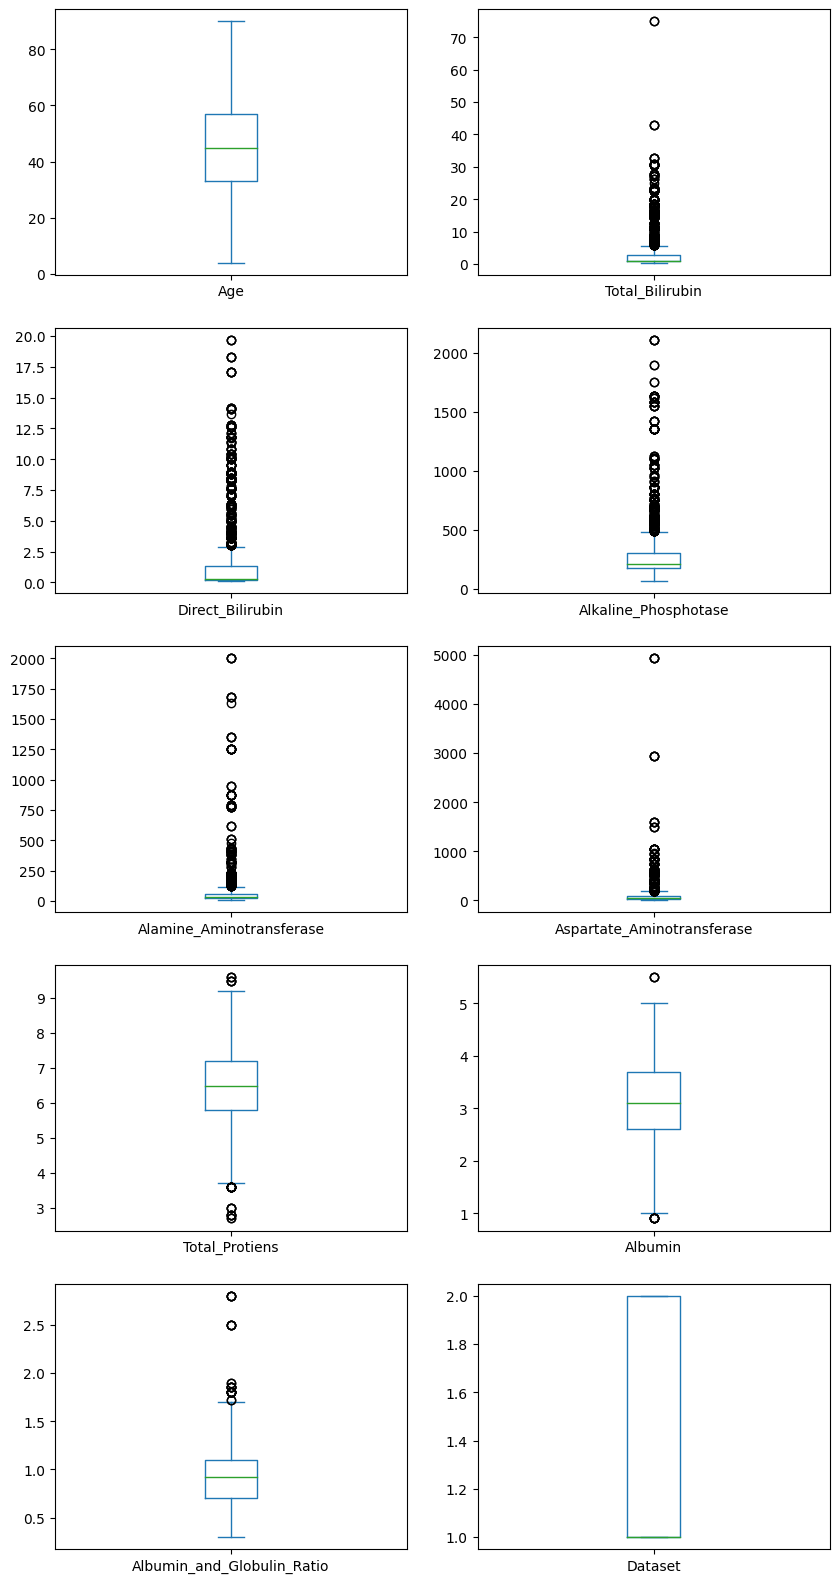

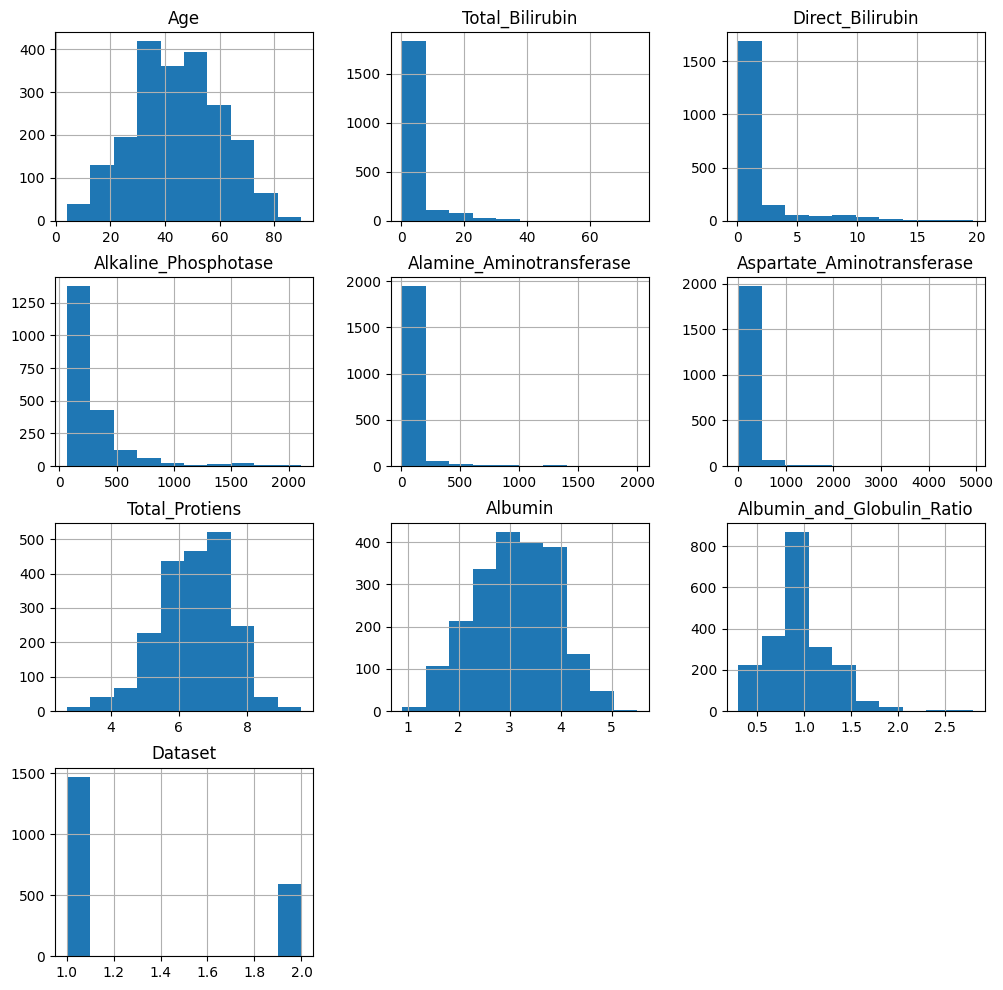

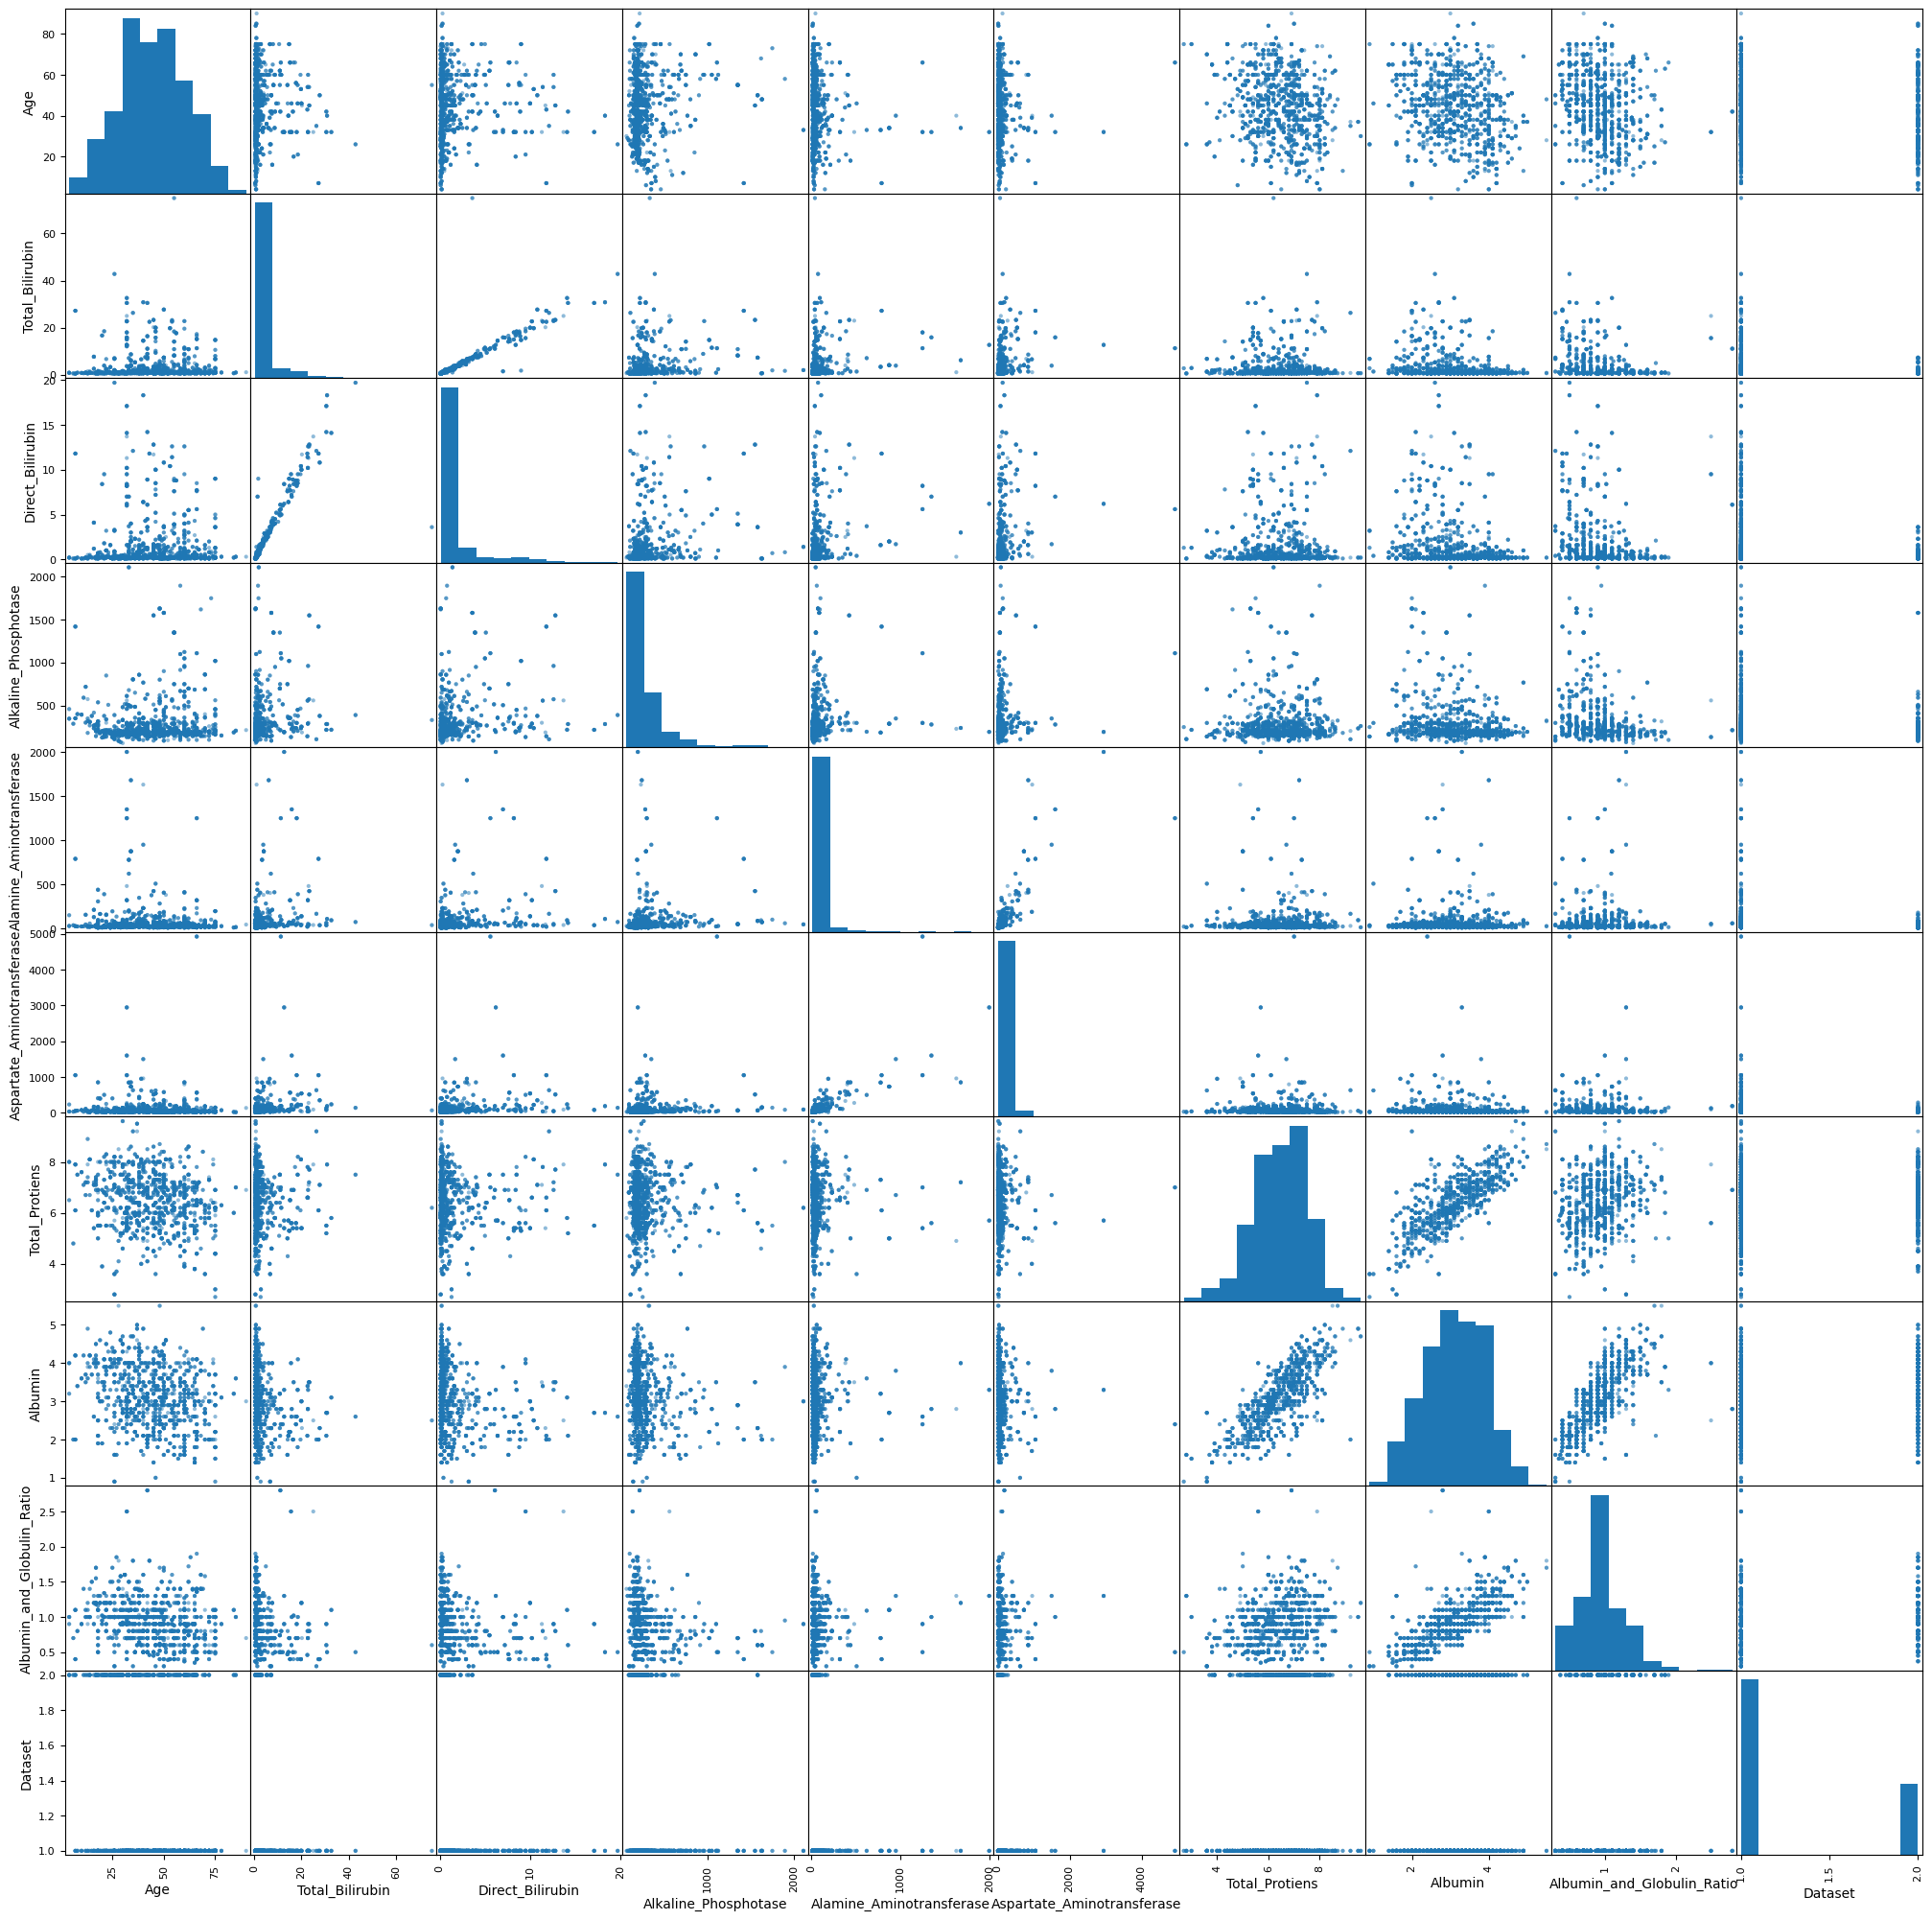

In [16]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,2),sharex=False, sharey=False, figsize=(10,20))
pyplot.show()

# histograms
dataset.hist(figsize=(12,12))
pyplot.show()
# scatter plot matrix
scatter_matrix(dataset, figsize=(25,25))
pyplot.show()

SPLITTING THE FEATURES AND TARGET (Storing features column in x and target column in y)

In [17]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

ML MODEL TRAINING
(Evaluate each model)

In [19]:
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.745177 (0.031299)
LDA: 0.724001 (0.033243)
KNN: 0.846831 (0.018891)
CART: 0.967912 (0.021010)
NB: 0.552023 (0.034462)
SVM: 0.980624 (0.012066)


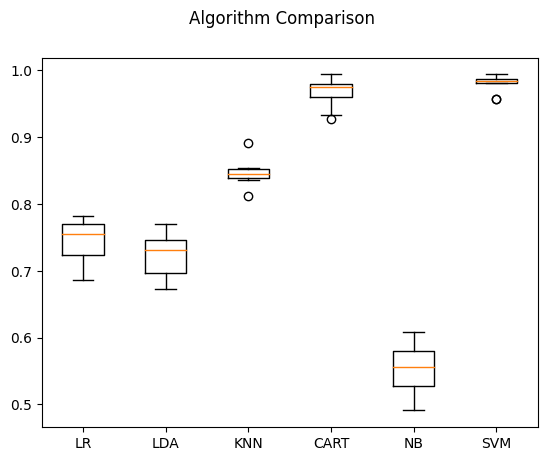

In [20]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
# Make predictions on validation dataset
Lr = LogisticRegression(solver='liblinear')
Lr.fit(X_train, Y_train)
predictions = Lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7415458937198067
[[270  15]
 [ 92  37]]
              precision    recall  f1-score   support

         1.0       0.75      0.95      0.83       285
         2.0       0.71      0.29      0.41       129

    accuracy                           0.74       414
   macro avg       0.73      0.62      0.62       414
weighted avg       0.74      0.74      0.70       414



In [22]:
# Make predictions on validation dataset
Svc = SVC(gamma='auto')
Svc.fit(X_train, Y_train)
predictions = Svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9637681159420289
[[285   0]
 [ 15 114]]
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.97       285
         2.0       1.00      0.88      0.94       129

    accuracy                           0.96       414
   macro avg       0.97      0.94      0.96       414
weighted avg       0.97      0.96      0.96       414



In [23]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.747590 (0.029997)
ScaledLDA: 0.724001 (0.033243)
ScaledKNN: 0.846842 (0.029084)
ScaledCART: 0.972150 (0.020857)
ScaledNB: 0.552023 (0.034462)
ScaledSVM: 0.745181 (0.032386)


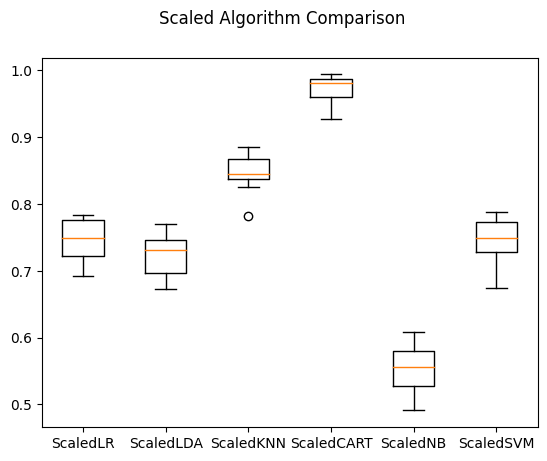

In [24]:
 # Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [25]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.800854 (0.029064)
GBM: 0.882556 (0.019254)
RF: 0.971555 (0.020095)
ET: 0.980632 (0.009691)


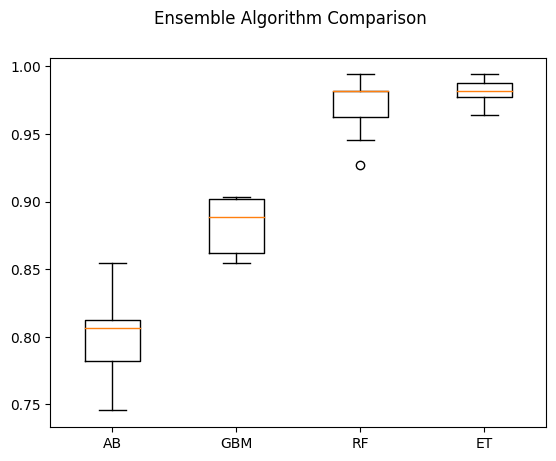

In [26]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=10, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

rescaledX

Best: 0.766349 using {'C': 2.0, 'kernel': 'rbf'}
0.718558 (0.034996) with: {'C': 0.1, 'kernel': 'linear'}
0.716740 (0.033356) with: {'C': 0.1, 'kernel': 'poly'}
0.718558 (0.034996) with: {'C': 0.1, 'kernel': 'rbf'}
0.717952 (0.036538) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.718558 (0.034996) with: {'C': 0.3, 'kernel': 'linear'}
0.731836 (0.029337) with: {'C': 0.3, 'kernel': 'poly'}
0.730033 (0.032205) with: {'C': 0.3, 'kernel': 'rbf'}
0.715549 (0.031585) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.718558 (0.034996) with: {'C': 0.5, 'kernel': 'linear'}
0.737897 (0.026366) with: {'C': 0.5, 'kernel': 'poly'}
0.740931 (0.032461) with: {'C': 0.5, 'kernel': 'rbf'}
0.673158 (0.034008) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.718558 (0.034996) with: {'C': 0.7, 'kernel': 'linear'}
0.739719 (0.028698) with: {'C': 0.7, 'kernel': 'poly'}
0.746382 (0.031932) with: {'C': 0.7, 'kernel': 'rbf'}
0.664681 (0.038787) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.718558 (0.034996) with: {'C': 0.9, 'kernel': 'linear'

array([[-0.4208627 , -0.19367827, -0.18547064, ...,  1.33783499,
         1.25647839,  0.19298024],
       [ 1.58784854, -0.34747886, -0.43219587, ..., -2.62110883,
        -0.52698989, -0.7679462 ],
       [ 1.33675963, -0.39874572, -0.43219587, ..., -1.05594499,
        -1.29133345, -1.08825501],
       ...,
       [-0.16977379, -0.43292363, -0.46744233, ...,  0.140945  ,
        -0.14481812, -0.44763738],
       [ 1.33675963, -0.38165677, -0.36170295, ...,  0.6012873 ,
         1.25647839,  1.34609197],
       [-0.86026828, -0.43292363, -0.46744233, ...,  0.78542423,
         1.1290878 ,  0.83359787]])

In [28]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(n_estimators=10)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.966183574879227
[[284   1]
 [ 13 116]]
              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       285
         2.0       0.99      0.90      0.94       129

    accuracy                           0.97       414
   macro avg       0.97      0.95      0.96       414
weighted avg       0.97      0.97      0.97       414



In [38]:
#Save model using Pickle
filename = 'indian_liver_patient.csv'
dump(model,open('indian_liver_patient.csv','wb'))
model= load(open('indian_liver_patient.csv','rb'))
loaded_model = load(open('indian_liver_patient.csv','rb'))

In [45]:
from pickle import load

# Load the pre-trained model
loaded_model = load(open('indian_liver_patient.csv', 'rb'))

# Define a function to make predictions
def predict_liver_disease(age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio):
    # Create a list of input features in the same order as they were used during training
    input_features = [[age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio]]

    # Make predictions using the loaded model
    prediction = loaded_model.predict(input_features)

    # Return the prediction (1 for liver disease, 2 for no liver disease)
    if prediction[0] == 1:
        return "Patient is likely to have liver disease."
    else:
        return "Patient is not likely to have liver disease."

# Example usage
age = 65
Total_Bilirubin = 0.7
Direct_Bilirubin = 0.1
Alkaline_Phosphotase = 187
Alamine_Aminotransferase = 16
Aspartate_Aminotransferase = 18
Total_Protiens = 6.8
Albumin = 3.3
Albumin_and_Globulin_Ratio = 0.9

# Call the function with the input values
result = predict_liver_disease(age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio)

# Print the prediction result
print(result)


Patient is likely to have liver disease.
